In [17]:
from random import random
import scipy.stats as stats
import numpy as np

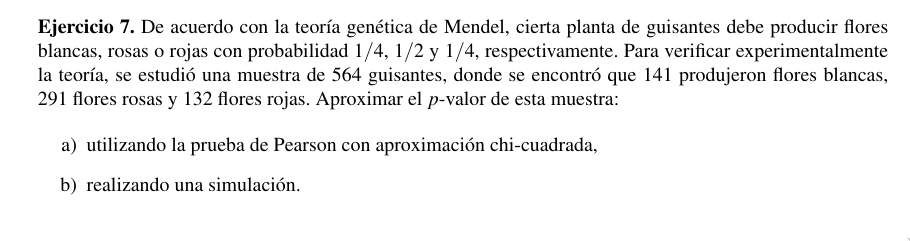

In [4]:
n = 564
# Frecuencias observadas
N = [141, 291, 132]
# Probabilidad teorica
p = [0.25, 0.5, 0.25]
t = 0
for i in range(len(N)):
  t += ((N[i] - n*p[i])**2)/(n*p[i])

# Determinamos los grados de libertad = 3 - 1 = 2
df = 2
p_value = 1 - stats.chi2.cdf(t, df)
print(p_value)

0.6499557054800363


In [30]:
#H0: Los datos provienen de, p1=0.25, p2=0.5, p3=0.25
n = 564
p = [1/4, 1/2, 1/4]
N = [141, 291, 132]

def prob():
  # solo |p|=3
  u = random()
  if u < 0.25:
    return 0
  if u < 0.75:
    return 1
  else:
    return 2

t = 0
for i in range(len(N)):
  t += ((N[i] - n*p[i])**2)/(n*p[i])

def sim(T, nsim=10_000):
  pvalor = 0
  probs = [1/4, 1/2, 1/4]
  frec_muestra = np.zeros(3, int)
  for i in range(nsim):
    frec_muestra *= 0
    for j in range(n):
      p = prob()
      frec_muestra[p] += 1
    t = 0
    for j in range(3):
      t += (frec_muestra[j] - n*probs[j])**2 / (n*probs[j])
    if t >= T:
      pvalor += 1
  return pvalor/nsim

sim(t)


0.6563